# Functional connectivity: distance between conditions

In [1]:
# import necessary libraries
import pickle as pk
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sb
from rich import pretty
from rich.progress import track
from sklearn.metrics.pairwise import pairwise_distances
from tqdm import tqdm

pretty.install()

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/functional_connectivity/"
data_dir = "../data/preprocessing/"
data_out_dir = "../data/functional_connectivity/"
Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)
Path(data_out_dir).mkdir(parents=True, exist_ok=True)

In [2]:
# import dataframe and dictionary
# data_df = pk.load(open("../data/datadf.pkl", "rb"))
# data_dict = pk.load(open("../data/datadict.pkl", "rb"))

## Load windowed EEG data

In [3]:
n_cond = 6
n_windows = 6 * 18  # that's 18 per condition, there are 6 conditions

# 1080, 1 sec
# 216, 5 sec -> 36 points per condition
# 72, 15 sec -> 12 points per condition
# 36, 30 sec
# 18, 1 min
# 6, 3 min

In [5]:
# load file produced in 0C-process_data.ipynb
file_name = f"EEG_{int(n_windows/n_cond)}wind_per_condition"
cropped_data = pk.load(open(f"{data_dir}{file_name}_dict.pkl", "rb"))

In [6]:
sh = cropped_data["01"]["window 0"].shape
print(f"{sh[1]} points per window, ie {sh[1] / 150} sec")
print(f"{n_windows} windows, {n_windows / 6} windows per condition")

1358 points per window, ie 9.053333333333333 sec
108 windows, 18.0 windows per condition


In [6]:
# pandas DataFrame from the raw_data_dict
cropped_df = pd.DataFrame.from_dict(cropped_data, orient="index")
# save to a CSV file
# cropped_df.to_csv('../data/croppeddf.csv', index=False)

In [7]:
cropped_df

,name,group,window 0,channels 0,window 1,channels 1,window 2,channels 2,window 3,channels 3,...,window 103,channels 103,window 104,channels 104,window 105,channels 105,window 106,channels 106,window 107,channels 107
01,01,high,"[[1.0079775810241698e-05, 2.074808597564697e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[8.732605934143066e-06, 8.209209442138671e-06...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[3.9199738502502436e-06, 3.7186665534973144e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.2703986167907715e-05, -1.1578314781188964...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...",...,"[[-6.23218584060669e-06, -3.978972673416138e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[2.929094076156616e-06, 2.436065524816513e-07...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-9.13689911365509e-07, -4.746174812316895e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-5.161351203918457e-06, -5.2656593322753904e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-5.556305408477783e-06, -7.055978775024414e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P..."
02,02,high,"[[-5.6332302093505856e-06, -1.6634254455566406...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.8641523361206054e-05, -1.6194942474365235...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-4.3784728050231935e-06, 3.828264713287353e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.0019842386245728e-06, 4.569926261901855e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...",...,"[[-3.7520551681518553e-06, 1.0157716274261473e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-5.3882303237915035e-06, 6.069502830505371e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[1.5365340709686279e-06, 2.539697289466858e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-4.226056575775146e-06, -8.117185592651367e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.2238801956176757e-05, -7.574803829193115e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P..."
03,03,high,"[[-1.7440322041511534e-07, -5.314565658569335e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[2.889520168304443e-06, 9.908685684204102e-07...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[2.7012293338775635e-06, -2.303989887237549e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[3.2440504431724544e-07, 9.472047090530396e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...",...,"[[-3.7388966083526608e-06, -6.239902496337891e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[1.0009667873382568e-06, 1.6028611660003662e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.279509425163269e-06, -3.434632062911987e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[6.600733757019043e-06, -3.460297107696533e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.846622586250305e-06, 7.617786061018705e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P..."
04,04,high,"[[4.982749938964844e-06, 1.2489630699157714e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[2.9165451526641846e-06, 2.237622499465942e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-6.846760749816894e-06, -1.3148097038269042e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[1.5707006454467773e-05, 1.6866891860961914e-...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...",...,"[[-1.0417428016662598e-05, -9.395277023315429e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[7.603892087936401e-07, -1.604968547821045e-0...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.3410489082336425e-05, -1.7722192764282225...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-1.1575652360916136e-06, -6.624311923980713e...","[F7, F3, FZ, F4, F8, C3, C4, T7, CZ, T8, P3, P...","[[-5.050833225250244e-06, -6.488525867462158e-...","[F7, F3, FZ, F4, F8, C3, C4, T7

## FC matrix for each subject and condition

In [8]:
corr_dict = dict()

# loop through each file in the list of EEG files
for key in track(cropped_data):
    # extract information from the dictionary
    subject = cropped_data[key]["name"]
    group = cropped_data[key]["group"]

    conditions = []
    for id in range(n_windows):
        condition = "window " + str(id)
        conditions.append(condition)

        ch = cropped_data[key]["channels " + str(id)]
        serie = cropped_data[key][condition]
        raw_data = pd.DataFrame(serie.T, columns=ch)
        corr = raw_data.corr()
        # create nested dictionary to store correlation data

        if group not in corr_dict:
            corr_dict[group] = dict()
        if subject not in corr_dict[group]:
            corr_dict[group][subject] = dict()
        if condition not in corr_dict[group][subject]:
            corr_dict[group][subject][condition] = dict()

        # store correlation data in dictionary
        corr_dict[group][subject][condition] = corr

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:02

## Distance matrix between all pairs of FC matrices

### Dictionary distances

In [9]:
distance = "correlation"  # correlation distance
my_group = "high"
n_ch = 16

dist_high = dict()

for subject in corr_dict[my_group]:
    my_subject = subject
    corr = np.zeros((len(conditions), n_ch**2))

    for i, condition_i in enumerate(conditions):
        corr_i_flat = corr_dict[my_group][my_subject][condition_i].to_numpy().flatten()
        corr[i] = corr_i_flat

    distance_matrix = pairwise_distances(corr, metric=distance)

    if subject not in dist_high:
        dist_high[subject] = dict()

    # store correlation data in dictionary
    dist_high[subject] = distance_matrix

In [10]:
dist_high["01"].shape  # n_windows x n_windows

(108, 108)

In [11]:
my_group = "low"
n_ch = 16
dist_low = dict()


for subject in corr_dict[my_group]:
    my_subject = subject
    corr = np.zeros((len(conditions), n_ch**2))

    for i, condition_i in enumerate(conditions):
        corr_i_flat = corr_dict[my_group][my_subject][condition_i].to_numpy().flatten()
        corr[i] = corr_i_flat

    distance_matrix = pairwise_distances(corr, metric=distance)

    if subject not in dist_low:
        dist_low[subject] = dict()

    # store correlation data in dictionary
    dist_low[subject] = distance_matrix

### Dataframe distances

In [12]:
dist_high_dict = {}
conditions = ["ROE", "RCE", "IND1", "IND2", "NH", "POST"]
# Iterate over subjects in dist_high dictionary
for subject in dist_high.keys():
    # Create a new dataframe for each subject's distance matrix
    df = pd.DataFrame(dist_high[subject])
    # Stack the matrix to put all values in a single column
    stacked = df.stack().reset_index()
    # print(stacked)
    # Rename columns
    stacked.columns = ["Row", "Column", "Distance"]

    # Add subject and group information as columns
    stacked["Subject"] = subject
    stacked["Group"] = "high"
    stacked["Label"] = "others"  # inizializza la colonna Label con "others"

    stacked["Condition i"] = ""
    stacked["Condition j"] = ""

    for i in range(n_cond):
        rows = np.arange(
            i * (n_windows / n_cond), i * (n_windows / n_cond) + (n_windows / n_cond)
        )
        cols = np.arange(
            i * (n_windows / n_cond), i * (n_windows / n_cond) + (n_windows / n_cond)
        )
        mask = (stacked["Row"].isin(rows)) & (stacked["Column"].isin(cols))
        stacked.loc[
            mask, "Label"
        ] = "self"  # aggiorna solo le righe corrispondenti alla maschera
        stacked.loc[stacked["Row"].isin(rows), "Condition i"] = conditions[i]
        stacked.loc[stacked["Column"].isin(cols), "Condition j"] = conditions[i]

    new_stacked = stacked[
        [
            "Row",
            "Column",
            "Condition i",
            "Condition j",
            "Subject",
            "Group",
            "Distance",
            "Label",
        ]
    ]
    new_stacked.loc[:, "Conditions"] = (
        new_stacked["Condition i"].astype(str)
        + "-"
        + new_stacked["Condition j"].astype(str)
    )

    dist_high_dict[subject] = new_stacked

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6969/1288742078.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stacked.loc[:, "Conditions"] = (
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6969/1288742078.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stacked.loc[:, "Conditions"] = (
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6969/1288742078.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [13]:
dist_high_dict["01"]

,Row,Column,Condition i,Condition j,Subject,Group,Distance,Label,Conditions
0,0,0,ROE,ROE,01,high,0.000000,self,ROE-ROE
1,0,1,ROE,ROE,01,high,0.100673,self,ROE-ROE
2,0,2,ROE,ROE,01,high,0.085395,self,ROE-ROE
3,0,3,ROE,ROE,01,high,0.082055,self,ROE-ROE
4,0,4,ROE,ROE,01,high,0.118034,self,ROE-ROE
...,...,...,...,...,...,...,...,...,...
11659,107,103,POST,POST,01,high,0.132584,self,POST-POST
11660,107,104,POST,POST,01,high,0.107609,self,POST-POST
11661,107,105,POST,POST,01,high,0.165400,self,POST-POST
11662,107,106,POST,POST,01,high,0.149149,self,POST-POST


In [14]:
n_windows**2 # (18 * 6)**2

11664

In [15]:
dist_low_dict = {}
conditions = ["ROE", "RCE", "IND1", "IND2", "NH", "POST"]
# Iterate over subjects in dist_high dictionary
for subject in dist_low.keys():
    # Create a new dataframe for each subject's distance matrix
    df = pd.DataFrame(dist_low[subject])
    # Stack the matrix to put all values in a single column
    stacked = df.stack().reset_index()
    # print(stacked)
    # Rename columns
    stacked.columns = ["Row", "Column", "Distance"]

    # Add subject and group information as columns
    stacked["Subject"] = subject
    stacked["Group"] = "low"
    stacked["Label"] = "others"  # inizializza la colonna Label con "others"

    stacked["Condition i"] = ""
    stacked["Condition j"] = ""
    for i in range(n_cond):
        rows = np.arange(
            i * (n_windows / n_cond), i * (n_windows / n_cond) + (n_windows / n_cond)
        )
        cols = np.arange(
            i * (n_windows / n_cond), i * (n_windows / n_cond) + (n_windows / n_cond)
        )
        mask = (stacked["Row"].isin(rows)) & (stacked["Column"].isin(cols))
        stacked.loc[
            mask, "Label"
        ] = "self"  # aggiorna solo le righe corrispondenti alla maschera
        stacked.loc[stacked["Row"].isin(rows), "Condition i"] = conditions[i]
        stacked.loc[stacked["Column"].isin(cols), "Condition j"] = conditions[i]

    new_stacked = stacked[
        [
            "Row",
            "Column",
            "Condition i",
            "Condition j",
            "Subject",
            "Group",
            "Distance",
            "Label",
        ]
    ]
    new_stacked.loc[:, "Conditions"] = (
        new_stacked["Condition i"].astype(str)
        + "-"
        + new_stacked["Condition j"].astype(str)
    )

    dist_low_dict[subject] = new_stacked

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6969/3653771568.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stacked.loc[:, "Conditions"] = (
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6969/3653771568.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stacked.loc[:, "Conditions"] = (
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6969/3653771568.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [16]:
dist = dist_high_dict
dist.update(dist_low_dict)

In [17]:
# Creazione del dataframe
dist_df = pd.concat(dist.values())

In [18]:
dist_df

,Row,Column,Condition i,Condition j,Subject,Group,Distance,Label,Conditions
0,0,0,ROE,ROE,01,high,0.000000,self,ROE-ROE
1,0,1,ROE,ROE,01,high,0.100673,self,ROE-ROE
2,0,2,ROE,ROE,01,high,0.085395,self,ROE-ROE
3,0,3,ROE,ROE,01,high,0.082055,self,ROE-ROE
4,0,4,ROE,ROE,01,high,0.118034,self,ROE-ROE
...,...,...,...,...,...,...,...,...,...
11659,107,103,POST,POST,31,low,0.269926,self,POST-POST
11660,107,104,POST,POST,31,low,0.258178,self,POST-POST
11661,107,105,POST,POST,31,low,0.287832,self,POST-POST
11662,107,106,POST,POST,31,low,0.222897,self,POST-POST


In [19]:
30*n_windows**2

349920

### Draw barplot

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RCE-NH_high vs. RCE-NH_low: Wilcoxon test (paired samples), P_val:4.309e-18 Stat=5.058e+06
RCE-POST_high vs. RCE-POST_low: Wilcoxon test (paired samples), P_val:2.449e-17 Stat=5.078e+06
IND1-IND1_high vs. IND1-IND1_low: Wilcoxon test (paired samples), P_val:3.693e-03 Stat=5.008e+06
IND1-IND2_high vs. IND1-IND2_low: Wilcoxon test (paired samples), P_val:3.345e-04 Stat=5.555e+06
IND1-NH_high vs. IND1-NH_low: Wilcoxon test (paired samples), P_val:3.670e-14 Stat=5.165e+06
IND1-POST_high vs. IND1-POST_low: Wilcoxon test (paired samples), P_val:3.782e-12 Stat=5.227e+06
IND2-IND2_high vs. IND2-IND2_low: Wilcoxon test (paired samples), P_val:4.484e-02 Stat=5.088e+06
IND2-NH_high vs. IND2-NH_low: Wilcoxon test (paired samples), P_val:1.025e-11 Stat=5.241e+06
IND2-POST_high vs. IND2-POST_low: Wilcoxon test (paired sam

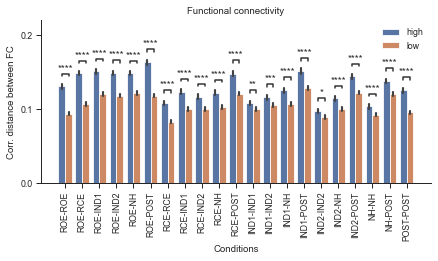

In [20]:
fig, ax = plt.subplots(figsize=(7, 3))

order = [
    ("ROE-ROE"),
    ("ROE-RCE"),
    ("ROE-IND1"),
    ("ROE-IND2"),
    ("ROE-NH"),
    ("ROE-POST"),
    ("RCE-RCE"),
    ("RCE-IND1"),
    ("RCE-IND2"),
    ("RCE-NH"),
    ("RCE-POST"),
    ("IND1-IND1"),
    ("IND1-IND2"),
    ("IND1-NH"),
    ("IND1-POST"),
    ("IND2-IND2"),
    ("IND2-NH"),
    ("IND2-POST"),
    ("NH-NH"),
    ("NH-POST"),
    ("POST-POST"),
]

unique_pairs_df = pd.DataFrame(order, columns=["Conditions"])

# Creazione del barplot utilizzando il DataFrame delle coppie uniche
sb.barplot(
    x="Conditions",
    y="Distance",
    data=dist_df,
    hue="Group",
    order=unique_pairs_df["Conditions"],
)

# Titolo del grafico
plt.title("Functional connectivity")

var = order
pairs = [[(i, "high"), (i, "low")] for i in var]

from statannotations.Annotator import Annotator

annotator = Annotator(
    ax,
    pairs,
    data=dist_df,
    x="Conditions",
    y="Distance",
    hue="Group",
    order=order,
    hue_order=["high", "low"],
)
annotator.configure(test="Wilcoxon", text_format="star", loc="inside")
annotator.apply_and_annotate()
plt.xticks(rotation=90)

ax.set_ylim(ymax=0.22)
ax.set_yticks([0, 0.1, 0.2])
ax.set_ylabel("Corr. distance between FC")

sb.move_legend(ax, loc="best", frameon=False, title="")
sb.despine()

fig_name = f"distance_between_FCs_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RCE-IND1_high vs. RCE-IND1_low: Wilcoxon test (paired samples), P_val:9.223e-22 Stat=4.968e+06
ROE-RCE_high vs. ROE-RCE_low: Wilcoxon test (paired samples), P_val:1.272e-102 Stat=3.802e+06
IND1-IND2_high vs. IND1-IND2_low: Wilcoxon test (paired samples), P_val:3.345e-04 Stat=5.555e+06
IND2-NH_high vs. IND2-NH_low: Wilcoxon test (paired samples), P_val:1.025e-11 Stat=5.241e+06
NH-POST_high vs. NH-POST_low: Wilcoxon test (paired samples), P_val:9.118e-12 Stat=5.239e+06
ROE-POST_high vs. ROE-POST_low: Wilcoxon test (paired samples), P_val:2.919e-82 Stat=4.027e+06


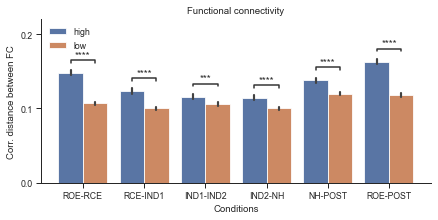

In [21]:
fig, ax = plt.subplots(figsize=(7, 3))

order = [
    #("ROE-ROE"),
    ("ROE-RCE"),
    #("ROE-IND1"),
    #("ROE-IND2"),
    #("ROE-NH"),
    #("ROE-POST"),
    #("RCE-RCE"),
    ("RCE-IND1"),
    #("RCE-IND2"),
    #("RCE-NH"),
    #("RCE-POST"),
    #("IND1-IND1"),
    ("IND1-IND2"),
    #("IND1-NH"),
    #("IND1-POST"),
    #("IND2-IND2"),
    ("IND2-NH"),
    #("IND2-POST"),
    #("NH-NH"),
    ("NH-POST"),
    #("POST-POST"),
    ("ROE-POST")
]

unique_pairs_df = pd.DataFrame(order, columns=["Conditions"])

# Creazione del barplot utilizzando il DataFrame delle coppie uniche
sb.barplot(
    x="Conditions",
    y="Distance",
    data=dist_df,
    hue="Group",
    order=unique_pairs_df["Conditions"],
)

# Titolo del grafico
plt.title("Functional connectivity")

var = order
pairs = [[(i, "high"), (i, "low")] for i in var]

from statannotations.Annotator import Annotator

annotator = Annotator(
    ax,
    pairs,
    data=dist_df,
    x="Conditions",
    y="Distance",
    hue="Group",
    order=order,
    hue_order=["high", "low"],
)
annotator.configure(test="Wilcoxon", text_format="star", loc="inside")
annotator.apply_and_annotate()
#plt.xticks(rotation=90)

ax.set_ylim(ymax=0.22)
ax.set_yticks([0, 0.1, 0.2])
ax.set_ylabel("Corr. distance between FC")

sb.move_legend(ax, loc="best", frameon=False, title="")
sb.despine()

fig_name = f"distance_between_FCs_temporal_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high_NH-POST vs. high_ROE-POST: Welch's t-test independent samples, P_val:1.712e-24 t=-1.024e+01
low_ROE-RCE vs. low_RCE-IND1: Welch's t-test independent samples, P_val:4.984e-05 t=4.058e+00
low_RCE-IND1 vs. low_IND1-IND2: Welch's t-test independent samples, P_val:3.660e-03 t=-2.907e+00
low_IND2-NH vs. low_NH-POST: Welch's t-test independent samples, P_val:4.091e-30 t=-1.144e+01
low_NH-POST vs. low_ROE-POST: Welch's t-test independent samples, P_val:1.907e-01 t=1.309e+00
high_ROE-RCE vs. high_RCE-IND1: Welch's t-test independent samples, P_val:4.273e-26 t=1.060e+01
high_RCE-IND1 vs. high_IND1-IND2: Welch's t-test independent samples, P_val:2.162e-03 t=3.068e+00
high_IND1-IND2 vs. high_IND2-NH: Welch's t-test independent samples, P_val:5.565e-01 t=5.880e-01
high_IND2-NH vs. high_NH-POST: Welch's t-test indepe

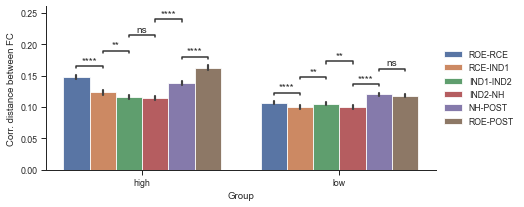

In [22]:
fig, ax = plt.subplots(figsize=(7, 3))

order = [
    #("ROE-ROE"),
    ("ROE-RCE"),
    #("ROE-IND1"),
    #("ROE-IND2"),
    #("ROE-NH"),
    #("ROE-POST"),
    #("RCE-RCE"),
    ("RCE-IND1"),
    #("RCE-IND2"),
    #("RCE-NH"),
    #("RCE-POST"),
    #("IND1-IND1"),
    ("IND1-IND2"),
    #("IND1-NH"),
    #("IND1-POST"),
    #("IND2-IND2"),
    ("IND2-NH"),
    #("IND2-POST"),
    #("NH-NH"),
    ("NH-POST"),
    #("POST-POST"),
    ("ROE-POST")
]

unique_pairs_df = pd.DataFrame(order, columns=["Conditions"])

# Creazione del barplot utilizzando il DataFrame delle coppie uniche
sb.barplot(
    hue="Conditions",
    y="Distance",
    data=dist_df,
    x="Group",
    hue_order=order, #unique_pairs_df["Conditions"],
)

# Titolo del grafico
#plt.title("Functional connectivity")

var = order
#pairs = [[("high", i), ("low", i)] for i in var]

pairs = [[("high", i), ("high", j)] for i, j in zip(var[:-1], var[1:])]
pairs += [[("low", i), ("low", j)] for i, j in zip(var[:-1], var[1:])]


from statannotations.Annotator import Annotator

annotator = Annotator(
    ax,
    pairs,
    data=dist_df,
    hue="Conditions",
    y="Distance",
    x="Group",
    #order=order,
    hue_order=order,
)
annotator.configure(test="t-test_welch", text_format="star", loc="inside")
annotator.apply_and_annotate()
#plt.xticks(rotation=90)

#ax.set_ylim(ymax=0.22)
#ax.set_yticks([0, 0.1, 0.2])
ax.set_ylabel("Corr. distance between FC")

sb.move_legend(ax, frameon=False, title="", loc="center left", bbox_to_anchor=(1, 0.5))
sb.despine()

fig_name = f"distance_between_FCs__bygroup_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

In [23]:
import pingouin

In [24]:
msk_cond = dist_df["Conditions"].isin(order)
msk_high = dist_df["Group"] == "low"

In [25]:
pingouin.pairwise_tests(data=dist_df[msk_high*msk_cond], dv="Distance", between="Conditions", padjust="bonf")


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Conditions,IND1-IND2,IND2-NH,False,True,2.891407,9718.0,two-sided,3.843718e-03,5.765577e-02,bonf,1.483,0.058651
1,Conditions,IND1-IND2,NH-POST,False,True,-8.110074,9718.0,two-sided,5.670570e-16,8.505855e-15,bonf,3.736e+12,-0.164508
2,Conditions,IND1-IND2,RCE-IND1,False,True,2.906802,9718.0,two-sided,3.659696e-03,5.489545e-02,bonf,1.551,0.058963
3,Conditions,IND1-IND2,ROE-POST,False,True,-6.984159,9718.0,two-sided,3.053508e-12,4.580262e-11,bonf,8.11e+08,-0.141670
4,Conditions,IND1-IND2,ROE-RCE,False,True,-0.807901,9718.0,two-sided,4.191672e-01,1.000000e+00,bonf,0.032,-0.016388
5,Conditions,IND2-NH,NH-POST,False,True,-11.440530,9718.0,two-sided,4.086492e-30,6.129739e-29,bonf,3.546e+26,-0.232065
6,Conditions,IND2-NH,RCE-IND1,False,True,0.048621,9718.0,two-sided,9.612219e-01,1.000000e+00,bonf,0.023,0.000986
7,Conditions,IND2-NH,ROE-POST,False,True,-10.326046,9718.0,two-sided,7.222320e-25,1.083348e-23,bonf,2.254e+21,-0.209458
8,Conditions,IND2-NH,ROE-RCE,False,True,-4.061022,9718.0,two-sided,4.924182e-05,7.386272e-04,bonf,85.513,-0.082376
9,Conditions,NH-POST,RCE-IND1,False,True,11.350065,9718.0,two-sided,1.138947e-29,1.708420e-28,bonf,1.284e+26,0.230230


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high_NH-NH vs. high_NH-POST: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.495e-145 Stat=3.384e+06
low_IND2-NH vs. low_NH-NH: Wilcoxon test (paired samples) with Bonferroni correction, P_val:3.216e-12 Stat=5.193e+06
low_NH-NH vs. low_NH-POST: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.042e-115 Stat=3.660e+06
high_IND2-NH vs. high_NH-NH: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.017e-12 Stat=5.178e+06
high_IND1-NH vs. high_NH-NH: Wilcoxon test (paired samples) with Bonferroni correction, P_val:7.909e-85 Stat=3.985e+06
low_IND1-NH vs. low_NH-NH: Wilcoxon test (paired samples) with Bonferroni correction, P_val:5.031e-31 Stat=4.754e+06
high_RCE-NH vs. high_NH-NH: Wilcoxon test (paired samples) with Bonferroni correction, P_val:9.370e-75 Stat=4

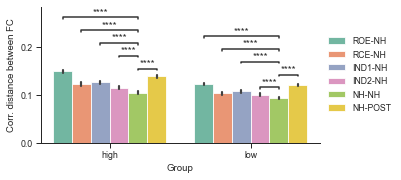

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.5))

order = [
    #("ROE-ROE"),
    #("ROE-RCE"),
    #("ROE-IND1"),
    #("ROE-IND2"),
    ("ROE-NH"),
    #("ROE-POST"),
    #("RCE-RCE"),
    #("RCE-IND1"),
    #("RCE-IND2"),
    ("RCE-NH"),
    #("RCE-POST"),
    #("IND1-IND1"),
    #("IND1-IND2"),
    ("IND1-NH"),
    #("IND1-POST"),
    #("IND2-IND2"),
    ("IND2-NH"),
    #("IND2-POST"),
    ("NH-NH"),
    ("NH-POST"),
    #,
    #("POST-POST"),
    #("ROE-POST")
]

unique_pairs_df = pd.DataFrame(order, columns=["Conditions"])

# Creazione del barplot utilizzando il DataFrame delle coppie uniche
im = sb.barplot(
    hue="Conditions",
    y="Distance",
    data=dist_df,
    x="Group",
    hue_order=order, #unique_pairs_df["Conditions"],
    palette="Set2"
)

# Titolo del grafico
#plt.title("Functional connectivity")

var = order
pairs = [[("high", i), ("high", ("NH-NH"))] for i in var if i!="NH-NH"]
pairs += [[("low", i), ("low", ("NH-NH"))] for i in var if i!="NH-NH"]


from statannotations.Annotator import Annotator

annotator = Annotator(
    ax,
    pairs,
    data=dist_df,
    hue="Conditions",
    y="Distance",
    x="Group",
    #order=order,
    hue_order=order,
)
annotator.configure(test="Wilcoxon", text_format="star", loc="inside", comparisons_correction="bonferroni")
annotator.apply_and_annotate()
#plt.xticks(rotation=90)

#ax.set_ylim(ymax=0.22)
ax.set_yticks([0, 0.1, 0.2])
ax.set_ylabel("Corr. distance between FC")

sb.move_legend(ax, frameon=False, title="", loc="center left", bbox_to_anchor=(1, 0.5))
sb.despine()

fig_name = f"distance_between_FCs_NH_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

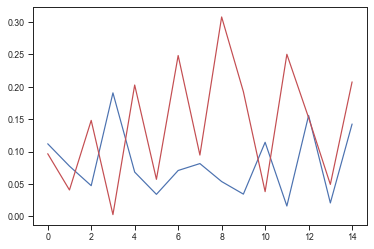

In [111]:
msk_cond = dist_df["Conditions"].isin(order)
msk_high = dist_df["Group"] == "low"
tests = pingouin.pairwise_tests(data=dist_df[msk_high*msk_cond], dv="Distance", between="Conditions", padjust="bonf")
tests["signif"] = tests["p-corr"].apply(lambda x: "yes" if x < 0.05 else "no")
tests
diclow = {}
for i,row in tests.iterrows():
    if row.A not in diclow:
        diclow[row.A] = {}
    diclow[row.A][row.B] = row.hedges;
    
plt.plot(np.abs(tests.hedges))
msk_cond = dist_df["Conditions"].isin(order)
msk_high = dist_df["Group"] == "high"
tests = pingouin.pairwise_tests(data=dist_df[msk_high*msk_cond], dv="Distance", between="Conditions", padjust="bonf")
tests["signif"] = tests["p-corr"].apply(lambda x: "yes" if x < 0.05 else "no")
tests
dichigh = {}
for i,row in tests.iterrows():
    if row.A not in dichigh:
        dichigh[row.A] = {}
    dichigh[row.A][row.B] = row.hedges;
    

plt.plot(np.abs(tests.hedges), 'r')


In [105]:
dic = {}
for i,row in tests.iterrows():
    if row.A not in dic:
        dic[row.A] = {}
    dic[row.A][row.B] = row.hedges;
    

Text(0.5, 1.0, 'high - low')

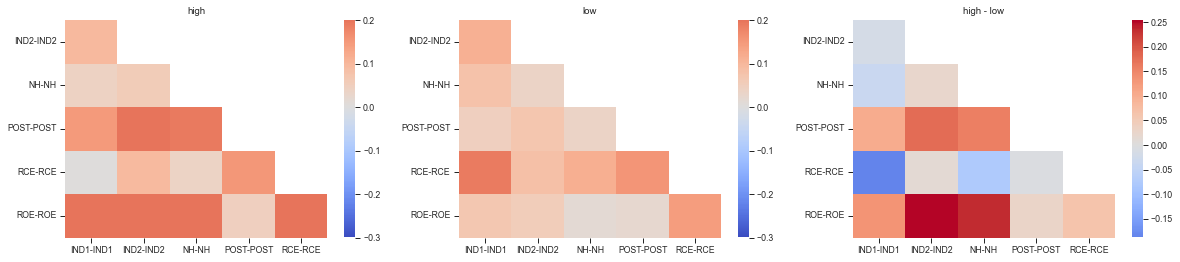

In [124]:
fig = plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sb.heatmap(np.abs(pd.DataFrame(dichigh)), vmin=-.3, vmax=.2, cmap="coolwarm", center=0)
plt.title("high")
plt.subplot(1,3,2)
sb.heatmap(np.abs(pd.DataFrame(diclow)), vmin=-.3, vmax=.2, cmap="coolwarm", center=0)
plt.title("low")

plt.subplot(1,3,3)
sb.heatmap(np.abs(pd.DataFrame(dichigh)) - np.abs(pd.DataFrame(diclow)), cmap="coolwarm", center=0)
plt.title("high - low")


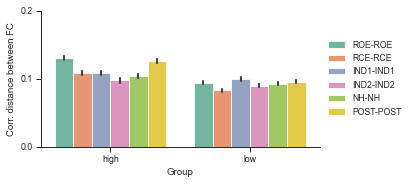

In [81]:
fig, ax = plt.subplots(figsize=(5, 2.5))

order = [
    ("ROE-ROE"),
    #("ROE-RCE"),
    #("ROE-IND1"),
    #("ROE-IND2"),
    #("ROE-NH"),
    #("ROE-POST"),
    ("RCE-RCE"),
    #("RCE-IND1"),
    #("RCE-IND2"),
    #("RCE-NH"),
    #("RCE-POST"),
    ("IND1-IND1"),
    #("IND1-IND2"),
    #("IND1-NH"),
    #("IND1-POST"),
    ("IND2-IND2"),
    #("IND2-NH"),
    #("IND2-POST"),
    ("NH-NH"),
    #("NH-POST"),
    #,
    ("POST-POST"),
    #("ROE-POST")
]

unique_pairs_df = pd.DataFrame(order, columns=["Conditions"])

# Creazione del barplot utilizzando il DataFrame delle coppie uniche
im = sb.barplot(
    hue="Conditions",
    y="Distance",
    data=dist_df,
    x="Group",
    hue_order=order, #unique_pairs_df["Conditions"],
    palette="Set2"
)

# Titolo del grafico
#plt.title("Functional connectivity")

var = order
pairs = [[("high", i), ("high", (f"{var}-{var}"))] for var in conditions]
pairs += [[("low", i), ("low", ("NH-NH"))] for i in var if i!="NH-NH"]


from statannotations.Annotator import Annotator

annotator = Annotator(
    ax,
    pairs,
    data=dist_df,
    hue="Conditions",
    y="Distance",
    x="Group",
    #order=order,
    hue_order=order,
)
#annotator.configure(test="Wilcoxon", text_format="star", loc="inside", comparisons_correction="bonferroni")
#annotator.apply_and_annotate()
#plt.xticks(rotation=90)

#ax.set_ylim(ymax=0.22)
ax.set_yticks([0, 0.1, 0.2])
ax.set_ylabel("Corr. distance between FC")

sb.move_legend(ax, frameon=False, title="", loc="center left", bbox_to_anchor=(1, 0.5))
sb.despine()

fig_name = f"distance_between_FCs_NH_{n_windows}_windows"
#plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

In [29]:
import pingouin
from pingouin import compute_effsize

In [37]:
distribution_1 = dist_df[mask_high * mask_nh]["Distance"]
distribution_2 = dist_df[mask_high * mask_other_cond]["Distance"]

In [40]:
effect_size = compute_effsize(distribution_1, distribution_2)
effect_size

-0.41070409709773664

['ROE', 'RCE', 'IND1', 'IND2', 'NH', 'POST']

In [78]:
effect_sizes_high = np.zeros((len(conditions), 2))


for i, other_cond in enumerate(conditions):
    
    mask_high = dist_df["Group"] == "high"
    
    mask_nh = dist_df["Conditions"] == "NH-NH"
    mask_other = dist_df["Conditions"] == f"{other_cond}-{other_cond}"
    
    nh_other = f"{other_cond}-NH" if other_cond!="POST" else f"NH-{other_cond}"
    mask_nh_other = dist_df["Conditions"] == nh_other
    
    distribution_1 = dist_df[mask_high * mask_nh]["Distance"]
    distribution_2 = dist_df[mask_high * mask_nh_other]["Distance"]
    distribution_3 = dist_df[mask_high * mask_other]["Distance"]

    effect_size_21 = compute_effsize(distribution_2, distribution_1)
    effect_size_23 = compute_effsize(distribution_2, distribution_3)
    
    
    effect_sizes_high[i] = [effect_size_21, effect_size_23]
    


In [79]:
effect_sizes_low = np.zeros((len(conditions), 2))


for i, other_cond in enumerate(conditions):
    
    mask_low = dist_df["Group"] == "low"
    
    mask_nh = dist_df["Conditions"] == "NH-NH"
    mask_other = dist_df["Conditions"] == f"{other_cond}-{other_cond}"
    
    nh_other = f"{other_cond}-NH" if other_cond!="POST" else f"NH-{other_cond}"
    mask_nh_other = dist_df["Conditions"] == nh_other
    
    distribution_1 = dist_df[mask_low * mask_nh]["Distance"]
    distribution_2 = dist_df[mask_low * mask_nh_other]["Distance"]
    distribution_3 = dist_df[mask_low * mask_other]["Distance"]

    effect_size_21 = compute_effsize(distribution_2, distribution_1)
    effect_size_23 = compute_effsize(distribution_2, distribution_3)
    
    
    effect_sizes_low[i] = [effect_size_21, effect_size_23]
    


In [27]:
dist_df

,Row,Column,Condition i,Condition j,Subject,Group,Distance,Label,Conditions
0,0,0,ROE,ROE,01,high,0.000000,self,ROE-ROE
1,0,1,ROE,ROE,01,high,0.100673,self,ROE-ROE
2,0,2,ROE,ROE,01,high,0.085395,self,ROE-ROE
3,0,3,ROE,ROE,01,high,0.082055,self,ROE-ROE
4,0,4,ROE,ROE,01,high,0.118034,self,ROE-ROE
...,...,...,...,...,...,...,...,...,...
11659,107,103,POST,POST,31,low,0.269926,self,POST-POST
11660,107,104,POST,POST,31,low,0.258178,self,POST-POST
11661,107,105,POST,POST,31,low,0.287832,self,POST-POST
11662,107,106,POST,POST,31,low,0.222897,self,POST-POST


In [28]:
df_to_save = dist_df[dist_df["Conditions"].isin(order)] # no double conditions A-B and B-A

In [29]:
df_to_save.to_csv(f"{data_out_dir}distances_btw_FC.csv", index=False)

In [41]:
df_to_save

,Row,Column,Condition i,Condition j,Subject,Group,Distance,Label,Conditions
0,0,0,ROE,ROE,01,high,0.000000,self,ROE-ROE
1,0,1,ROE,ROE,01,high,0.100673,self,ROE-ROE
2,0,2,ROE,ROE,01,high,0.085395,self,ROE-ROE
3,0,3,ROE,ROE,01,high,0.082055,self,ROE-ROE
4,0,4,ROE,ROE,01,high,0.118034,self,ROE-ROE
...,...,...,...,...,...,...,...,...,...
11659,107,103,POST,POST,31,low,0.269926,self,POST-POST
11660,107,104,POST,POST,31,low,0.258178,self,POST-POST
11661,107,105,POST,POST,31,low,0.287832,self,POST-POST
11662,107,106,POST,POST,31,low,0.222897,self,POST-POST


In [83]:
df_to_save[df_to_save.Subject=="01"]

,Row,Column,Condition i,Condition j,Subject,Group,Distance,Label,Conditions
0,0,0,ROE,ROE,01,high,0.000000,self,ROE-ROE
1,0,1,ROE,ROE,01,high,0.100673,self,ROE-ROE
2,0,2,ROE,ROE,01,high,0.085395,self,ROE-ROE
3,0,3,ROE,ROE,01,high,0.082055,self,ROE-ROE
4,0,4,ROE,ROE,01,high,0.118034,self,ROE-ROE
...,...,...,...,...,...,...,...,...,...
11659,107,103,POST,POST,01,high,0.132584,self,POST-POST
11660,107,104,POST,POST,01,high,0.107609,self,POST-POST
11661,107,105,POST,POST,01,high,0.165400,self,POST-POST
11662,107,106,POST,POST,01,high,0.149149,self,POST-POST


In [87]:
df_to_save.groupby(["Group", "Conditions", "Subject"])["Distance"].mean().reset_index()

,Group,Conditions,Subject,Distance
0,high,IND1-IND1,01,0.039317
1,high,IND1-IND1,02,0.170575
2,high,IND1-IND1,03,0.102055
3,high,IND1-IND1,04,0.053151
4,high,IND1-IND1,05,0.348674
...,...,...,...,...
625,low,ROE-ROE,27,0.054047
626,low,ROE-ROE,28,0.121323
627,low,ROE-ROE,29,0.117496
628,low,ROE-ROE,30,0.081057


In [58]:
sb.barplot(data=df_to_save.groupby(["Group", "Conditions", "Subject"])["Distance"].mean().reset_index(), 
          y="Distance", x="Conditions", hue="Group")

NameError: name 'df_to_save' is not defined

### Distance matrices

In [59]:
conditions_list = ["ROE", "RCE", "IND1", "IND2", "NH", "POST"]

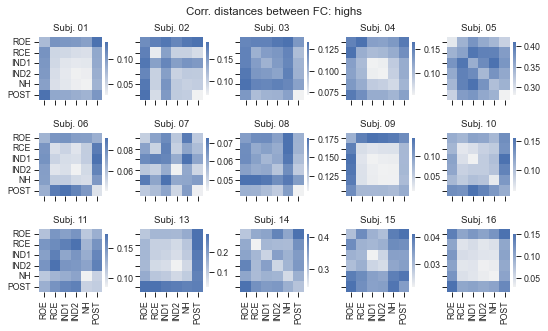

In [60]:
matrix_highs = dict()

n_row, n_col = 3, 5
fig, axs = plt.subplots(
    n_row,
    n_col,
    figsize=(n_col * 1.5, n_row * 1.5),
    sharex=True,
    sharey=True,
    layout="constrained",
)
cmap = sb.color_palette("light:b", as_cmap=True)

num = int(n_windows / n_cond)

for subject_idx, subject in enumerate(dist_high):

    ax = axs.flat[subject_idx]

    matrix_1080 = dist_high[subject]

    matrix_6x6 = np.zeros((n_cond, n_cond))

    matrix_highs[subject] = dict()

    # Calcola le medie delle sottomatrici 180x180
    for i in range(n_cond):
        for j in range(n_cond):
            # Estrai il blocco 180x180 dalla matrice 1080x1080
            submatrix = matrix_1080[i * num : (i + 1) * num, j * num : (j + 1) * num]
            # Calcola la media dei valori nel blocco
            avg = np.mean(submatrix)
            # Assegna la media alla corrispondente posizione nella matrice 6x6
            matrix_6x6[i, j] = avg

    matrix_highs[subject] = matrix_6x6

    # create heatmap with seaborn
    sb.heatmap(
        matrix_6x6,
        cmap=cmap,
        square=True,
        cbar=True,
        ax=ax,
        xticklabels=conditions_list,
        yticklabels=conditions_list,
        cbar_kws={"shrink": 0.6},
    )

    # set title for subplot
    ax.set_title(f"Subj. {subject}")

# add suptitle to the figure
title = "Corr. distances between FC: highs"
plt.suptitle(title)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)

fig_name = f"distance_matrix_between_FCs_per_subj_highs_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

# adjust layout and display the figure
# plt.tight_layout()
plt.show()

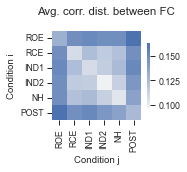

In [61]:
result_matrix_highs = np.zeros((n_cond, n_cond))
n_matrices_highs = len(matrix_highs)

for subject in matrix_highs:
    result_matrix_highs += matrix_highs[subject]

result_matrix_highs /= n_matrices_highs

fig, ax = plt.subplots(figsize=(2, 2))

title = "Avg. corr. dist. between FC"
plt.suptitle(title)

sb.heatmap(
    result_matrix_highs,
    cmap=cmap,
    square=True,
    cbar=True,
    ax=ax,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar_kws={"shrink": 0.6},
)

ax.set_xlabel("Condition j")
ax.set_ylabel("Condition i")

fig_name = f"distance_matrix_between_FCs_avg_highs_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

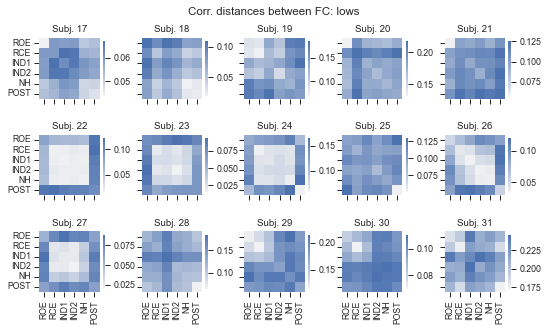

In [62]:
matrix_lows = dict()

n_row, n_col = 3, 5
fig, axs = plt.subplots(
    n_row,
    n_col,
    figsize=(n_col * 1.5, n_row * 1.5),
    sharex=True,
    sharey=True,
    layout="constrained",
)
cmap = sb.color_palette("light:b", as_cmap=True)

num = int(n_windows / n_cond)

for subject_idx, subject in enumerate(dist_low):

    ax = axs.flat[subject_idx]

    matrix_1080 = dist_low[subject]

    matrix_6x6 = np.zeros((n_cond, n_cond))

    matrix_lows[subject] = dict()

    # Calcola le medie delle sottomatrici 180x180
    for i in range(n_cond):
        for j in range(n_cond):
            # Estrai il blocco 180x180 dalla matrice 1080x1080
            submatrix = matrix_1080[i * num : (i + 1) * num, j * num : (j + 1) * num]
            # Calcola la media dei valori nel blocco
            avg = np.mean(submatrix)
            # Assegna la media alla corrispondente posizione nella matrice 6x6
            matrix_6x6[i, j] = avg

    matrix_lows[subject] = matrix_6x6

    # create heatmap with seaborn
    sb.heatmap(
        matrix_6x6,
        cmap=cmap,
        square=True,
        cbar=True,
        ax=ax,
        xticklabels=conditions_list,
        yticklabels=conditions_list,
        cbar_kws={"shrink": 0.6},
    )

    # set title for subplot
    ax.set_title(f"Subj. {subject}")

# add suptitle to the figure
title = "Corr. distances between FC: lows"
plt.suptitle(title)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)

fig_name = f"distance_matrix_between_FCs_per_subj_lows_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

# adjust layout and display the figure
# plt.tight_layout()
plt.show()

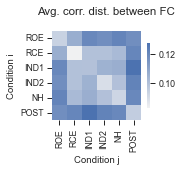

In [63]:
result_matrix_lows = np.zeros((n_cond, n_cond))
n_matrices_lows = len(matrix_lows)

for subject in matrix_lows:
    result_matrix_lows += matrix_lows[subject]

result_matrix_lows /= n_matrices_lows

fig, ax = plt.subplots(figsize=(2, 2))

title = "Avg. corr. dist. between FC"
plt.suptitle(title)

sb.heatmap(
    result_matrix_lows,
    cmap=cmap,
    square=True,
    cbar=True,
    ax=ax,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar_kws={"shrink": 0.6},
)

ax.set_xlabel("Condition j")
ax.set_ylabel("Condition i")

fig_name = f"distance_matrix_between_FCs_avg_lows_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

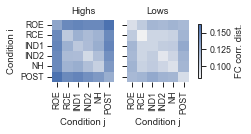

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(3.5, 2), sharex=False, sharey=True)

ax1, ax2 = axs

result_matrix_highs = np.zeros((6, 6))
n_matrices_highs = len(matrix_highs)

for subject in matrix_highs:
    result_matrix_highs += matrix_highs[subject]

result_matrix_highs /= n_matrices_highs


result_matrix_lows = np.zeros((n_cond, n_cond))
n_matrices_lows = len(matrix_lows)

for subject in matrix_lows:
    result_matrix_lows += matrix_lows[subject]

result_matrix_lows /= n_matrices_lows


min_high, max_high = np.min(result_matrix_highs), np.max(result_matrix_highs)
min_low, max_low = np.min(result_matrix_lows), np.max(result_matrix_lows)

vmin = min(min_low, min_high)
vmax = max(max_low, max_high)

im1 = sb.heatmap(
    result_matrix_highs,
    cmap=cmap,
    square=True,
    vmin=vmin, 
    vmax=vmax,
    cbar=False,
    ax=ax1,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar_kws={"shrink": 0.6},
)

ax1.set_xlabel("Condition j")
ax1.set_ylabel("Condition i")

#########


ax2 = sb.heatmap(
    result_matrix_lows,
    cmap=cmap,
    square=True,
    vmin=vmin, 
    vmax=vmax,
    cbar=False,
    ax=ax2,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar_kws={"shrink": 0.6},
)

ax2.set_xlabel("Condition j")
ax2.set_xticklabels(conditions_list, rotation=90, ha="center")
ax2.set_yticklabels(conditions_list, rotation=0, va="center")

fig.colorbar(
    ax1.collections[0], ax=axs, shrink=0.5, fraction=0.25, label="FC corr. dist.", ticks=[0.1, 0.125, 0.15],
)

ax1.set_title("Highs")
ax2.set_title("Lows")

title = "FC_DM_both"
# plt.suptitle(title)

fig_name = f"distance_matrices_between_FCs_avg_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

In [70]:
from scipy import stats
stats.zscore(result_matrix_highs)


array([[-1.86659264,  1.35295449,  1.32196961,  1.43816671,  1.57858085,
         1.55922168],
       [-0.00614165, -1.29995262, -0.35242551, -0.32955797, -0.22057532,
         0.25001025],
       [ 0.27611024, -0.28913166, -1.26418996, -0.39300486, -0.00819604,
         0.55360586],
       [ 0.01196045, -0.71298717, -0.81182698, -1.42824672, -0.74471192,
        -0.08406257],
       [ 0.02297007, -0.37316731, -0.24011477, -0.47277346, -1.46910236,
        -0.59332517],
       [ 1.56169352,  1.32228426,  1.34658761,  1.1854163 ,  0.86400479,
        -1.68545006]])

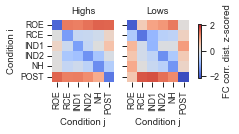

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(3.5, 2), sharex=False, sharey=True)

ax1, ax2 = axs

result_matrix_highs = np.zeros((6, 6))
n_matrices_highs = len(matrix_highs)

for subject in matrix_highs:
    result_matrix_highs += matrix_highs[subject]

result_matrix_highs /= n_matrices_highs

result_matrix_highs_z = stats.zscore(result_matrix_highs)
result_matrix_lows_z = stats.zscore(result_matrix_lows)

min_high, max_high = np.min(result_matrix_highs_z), np.max(result_matrix_highs_z)
min_low, max_low = np.min(result_matrix_lows_z), np.max(result_matrix_lows_z)

vmin = min(min_low, min_high)
vmax = max(max_low, max_high)

im1 = sb.heatmap(
    stats.zscore(result_matrix_highs),
    cmap="coolwarm",
    square=True,
    cbar=False,
    center=0,
    vmin=vmin,
    vmax=-vmin,
    ax=ax1,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar_kws={"shrink": 0.6},
)

ax1.set_xlabel("Condition j")
ax1.set_ylabel("Condition i")

#########

result_matrix_lows = np.zeros((n_cond, n_cond))
n_matrices_lows = len(matrix_lows)

for subject in matrix_lows:
    result_matrix_lows += matrix_lows[subject]

result_matrix_lows /= n_matrices_lows

ax2 = sb.heatmap(
    stats.zscore(result_matrix_lows),
    cmap="coolwarm",
    square=True,
    cbar=False,
    center=0,
    vmin=vmin,
    vmax=-vmin,
    ax=ax2,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar_kws={"shrink": 0.6},
)

ax2.set_xlabel("Condition j")
ax2.set_xticklabels(conditions_list, rotation=90, ha="center")
ax2.set_yticklabels(conditions_list, rotation=0, va="center")

fig.colorbar(
    ax1.collections[0], ax=axs, shrink=0.5, fraction=0.25, label="FC corr. dist. z-scored", ticks=[-2, 0, 2]
)

ax1.set_title("Highs")
ax2.set_title("Lows")

title = "FC_DM_both"
# plt.suptitle(title)

fig_name = f"distance_matrices_between_FCs_avg_zscored__{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

In [89]:
vmin, vmax

(-2.128956106622199, 1.7199506977060164)

## Effect size

In [65]:
effect_size = np.zeros((n_cond, n_cond))

mask_high = dist_df["Group"] == "high"
mask_low = dist_df["Group"] == "low"

for i, condition_i in enumerate(conditions_list):
    mask_i = dist_df["Condition i"] == condition_i

    for j, condition_j in enumerate(conditions_list):
        mask_j = dist_df["Condition j"] == condition_j

        mask = mask_i & mask_j
        mask1 = mask_i & mask_j & mask_high
        mask2 = mask_i & mask_j & mask_low

        dist_filtered_high = dist_df[mask1]
        dist_filtered_low = dist_df[mask2]
        dist_filtered = dist_df[mask]

        difference = (
            dist_filtered_high["Distance"].mean() - dist_filtered_low["Distance"].mean()
        )
        pooled_std = np.sqrt(
            (
                (
                    dist_filtered_high["Distance"].std() ** 2
                    * (len(dist_filtered_high) - 1)
                )
                + (
                    dist_filtered_low["Distance"].std() ** 2
                    * (len(dist_filtered_low) - 1)
                )
            )
            / (len(dist_filtered_high) + len(dist_filtered_low) - 2)
        )
        effect_size[i, j] = difference / pooled_std

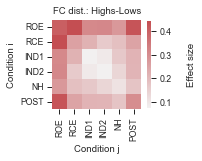

In [171]:
# title = "Cohen's d Effect Size - distance between correlation matrices"
# plt.suptitle(title)

cbar_kws = {"shrink": 0.8}
cmap = sb.color_palette("light:r", as_cmap=True)


fig, ax = plt.subplots(figsize=(2, 2))
sb.heatmap(
    effect_size,
    cmap=cmap,
    annot=False,
    fmt=".3f",
    square=True,
    ax=ax,
    xticklabels=conditions_list,
    yticklabels=conditions_list,
    cbar=True,
    cbar_kws=cbar_kws,
)
# vmin= -0.20, vmax= 0.20 ,


# ax = plt.gca()
# ax.set_xticklabels(conditions_list, rotation=0, ha="center")
# ax.set_yticklabels(conditions_list, rotation=0, va="center")

# Regola i tick per centrare le etichette
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

plt.xlabel("Condition j")
plt.ylabel("Condition i")

cbar = ax.collections[0].colorbar  # Get the color bar
cbar.set_label("Effect size", rotation=90, labelpad=15)  # Modify the label
cbar.set_ticks([0.1, 0.2, 0.3, 0.4])

plt.title("FC dist.: Highs-Lows")

fig_name = f"distance_matrices_between_FCs_effect_size_{n_windows}_windows"
plt.savefig(f"{results_dir}{fig_name}.png", facecolor="w", dpi=250, bbox_inches="tight")

plt.show()

In [30]:
dist_df.to_csv("../data/FC_dist_mat.csv")